In [14]:
from nbodykit.lab import *
from nbodykit import style, setup_logging
import matplotlib.pyplot as plt
plt.style.use(style.notebook)
import numpy as np
import nbodykit as nb
import momentum as m

In [15]:
#强制重载
import importlib
importlib.reload(m)

<module 'momentum' from '/Raid6/1/TeamYZ/xiting/momentum/momentum.py'>

In [16]:
#选择数据
num = 13
cat = m.data_read(num)

In [17]:
#加红移
#强制重载
import importlib
importlib.reload(m)

cat = m.RED(cat)

In [18]:
#加权重
cat = m.weight(cat)

In [19]:
importlib.reload(m)

<module 'momentum' from '/Raid6/1/TeamYZ/xiting/momentum/momentum.py'>

In [20]:
#pole
# r = m.density_pole(cat)

In [21]:
mesh = cat.to_mesh(window='tsc', Nmesh=512, BoxSize=1000,interlaced=True,compensated=True, position='RsdPos_x')
r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[1,0,0], poles=[0,2,4])
poles = r.poles

/tmp/ipykernel_30079/963484441.py:1: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = cat.to_mesh(window='tsc', Nmesh=512, BoxSize=1000,interlaced=True,compensated=True, position='RsdPos_x')


Text(0.5, 1.0, '12.5_RSD')

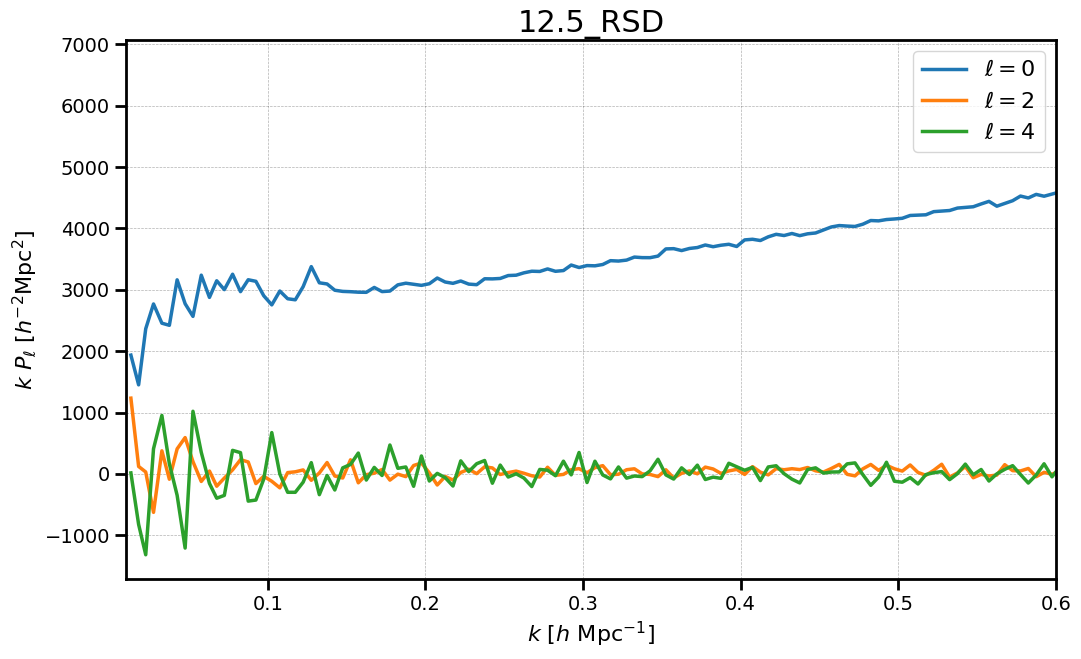

In [22]:
poles = r.poles
for ell in [0, 2, 4]:
    label = r'$\ell=%d$' % (ell)
    P = poles['power_%d' %ell].real
    if ell == 0: P = P - poles.attrs['shotnoise']
    plt.plot(poles['k'], poles['k'] * P, label=label)
plt.legend(loc=0)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$k \ P_\ell$ [$h^{-2} \mathrm{Mpc}^2$]")
plt.xlim(0.01, 0.6)
plt.title('12.5_RSD')

In [23]:
#绘图
plt.loglog(r00.power['k'], P00, label=r'$P_{00}$', color='red')

NameError: name 'r00' is not defined